# Problem Statement:
 A Software Company wants to predict whether customers opt for paid software subscription.
 The company wants to run a marketing campaign to target good customers for pitching them regarding new software services.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
sm = pd.read_csv("modeldata.csv")
sm.head()

,ID,extract_date,skill,job,purpose,target_group,business_group,business_segment,signup_source,signup_category,first_cc_subscription_dts,country_code,product_id,download_attempts,product_platforms,machines,error_codes,label
0,1,10-01-2017,BEGINNER,ACADEMIC,ME_PROFESSIONAL,HED - ED/FAC/STAFF,EDUCATION,EDU STUDENT STAFF,Creative Cloud,DESKTOP,03-12-2017 11:44,US,abcd:xyzz,2.0,MAC,1.0,NaN,0
1,2,10-01-2017,BEGINNER,ACADEMIC,ME_PROFESSIONAL,EDGEN - AD/ED/FAC/STAFF,EDUCATION,EDU STUDENT STAFF,Renga Auto Provisioning,DESKTOP,5/29/2017 15:35,US,xyzz,1.0,WIN,0.0,NaN,0
2,3,10-01-2017,BEGINNER,NaN,NaN,HOBBYIST,HOBBYIST,PHOTO,Draw (iOS),MOBILE,06-10-2017 01:04,US,ILST:abcd,3.0,MAC:WIN,1.0,NaN,0
3,4,10-01-2017,BEGINNER,STUDENT,ME_NONPROFESSIONAL,EDGEN - STUDENT,EDUCATION,EDU STUDENT STAFF,Renga Auto Provisioning,DESKTOP,1/21/2017 18:33,US,PPRO:AME,2.0,WIN,1.0,NaN,0
4,5,10-01-2017,BEGINNER,STUDENT,ME_PROFESSIONAL,EDGEN - STUDENT,EDUCATION,EDU STUDENT STAFF,Renga Auto Provisioning,DESKTOP,6/23/2017 14:46,US,IDSN,1.0,MAC,0.0,NaN,0


In [3]:
# imported this again just to have ID values in seperate dataframe
ID=pd.read_csv("modeldata.csv")

In [4]:
sm.shape

(334574, 18)

In [5]:
sm.describe(include="all")

,ID,extract_date,skill,job,purpose,target_group,business_group,business_segment,signup_source,signup_category,first_cc_subscription_dts,country_code,product_id,download_attempts,product_platforms,machines,error_codes,label
count,334574.000000,334574,334574,156302,156281,334574,334574,334547,334574,334574,334574,334574,211855,211855.000000,211855,211855.000000,14249,334574.000000
unique,NaN,1,5,14,5,38,9,6,104,5,173958,42,32219,NaN,3,NaN,1931,NaN
top,NaN,10-01-2017,BEGINNER,STUDENT,ME_PROFESSIONAL,EDGEN - STUDENT,EDUCATION,INDIVIDUAL,Renga Auto Provisioning,DESKTOP,02-07-2017 00:00,US,xyzz,NaN,WIN,NaN,6,NaN
freq,NaN,334574,142042,43785,91548,64685,97209,102622,214020,300471,118,281059,38441,NaN,125652,NaN,2039,NaN
mean,167287.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.048184,NaN,0.880928,NaN,0.053510
std,96583.338819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.895695,NaN,0.872541,NaN,0.225048
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,0.000000
25%,83644.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,0.000000
50%,167287.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000,NaN,0.000000
75%,250930.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1.000000,NaN,0.000000


In [6]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334574 entries, 0 to 334573
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         334574 non-null  int64  
 1   extract_date               334574 non-null  object 
 2   skill                      334574 non-null  object 
 3   job                        156302 non-null  object 
 4   purpose                    156281 non-null  object 
 5   target_group               334574 non-null  object 
 6   business_group             334574 non-null  object 
 7   business_segment           334547 non-null  object 
 8   signup_source              334574 non-null  object 
 9   signup_category            334574 non-null  object 
 10  first_cc_subscription_dts  334574 non-null  object 
 11  country_code               334574 non-null  object 
 12  product_id                 211855 non-null  object 
 13  download_attempts          21

In [7]:
# Checking for NA values

In [8]:
sm.isna().sum()/len(sm) *100

ID                            0.000000
extract_date                  0.000000
skill                         0.000000
job                          53.283280
purpose                      53.289556
target_group                  0.000000
business_group                0.000000
business_segment              0.008070
signup_source                 0.000000
signup_category               0.000000
first_cc_subscription_dts     0.000000
country_code                  0.000000
product_id                   36.679180
download_attempts            36.679180
product_platforms            36.679180
machines                     36.679180
error_codes                  95.741151
label                         0.000000
dtype: float64

In [9]:
#drop the error column as it has 95% na values
sm= sm.drop(["error_codes"], axis =1)

In [10]:
# We have collected the Nas together as None category since we cannot drop the column, and since we cannot impute it

sm.job= sm.job.fillna("NONE")
sm.purpose= sm.purpose.fillna("OTHER")

In [11]:
# Imputing the remaining columns 

sm.product_id= sm.product_id.fillna("xyzz")
sm.download_attempts= sm.download_attempts.fillna(sm.download_attempts.mean())
sm.product_platforms= sm.product_platforms.fillna("WIN")
sm.machines=sm.machines.fillna(1)
sm.business_segment= sm.business_segment.fillna("INDIVIDUAL")

In [12]:
sm.isna().sum()

ID                           0
extract_date                 0
skill                        0
job                          0
purpose                      0
target_group                 0
business_group               0
business_segment             0
signup_source                0
signup_category              0
first_cc_subscription_dts    0
country_code                 0
product_id                   0
download_attempts            0
product_platforms            0
machines                     0
label                        0
dtype: int64

In [13]:
sm.job.replace({"UNEXPECTEDVALUE":"NONE", "IT_PRO":"ITSECTOR","WEBMOBILEDESIGN":"ITSECTOR",
               "DEVELOPER":"ITSECTOR","PRINTGRAPHICDESIGN":"ITSECTOR","PHOTOGRAPHER":"ENTERTAINMENT",
               "BIZ_PRO":"ENTERTAINMENT","VIDEO":"ENTERTAINMENT","MARKETING":"OTHER","PURCHASEMANAGER":"OTHER",
               "STUDENT":"ACADEMIC","UNEXPECTEDVALUE":"OTHER"}, inplace=True)

In [14]:
sm.target_group.replace({"EDGEN - STUDENT":"EDUCATION","EDUCATION - GENERAL":"EDUCATION",
                         "HED - ED/FAC/STAFF":"EDUCATION",
                        "EDGEN - AD/ED/FAC/STAFF":"EDUCATION","HED - STUDENT":"EDUCATION",
                        "HED - ADMIN":"EDUCATION","APPLICATION DEVELOPER":"IT PROFESSIONAL",
                        "DIGITAL IMAGING PROFESSIONAL":"ENTERTAINMENT","MOBILE DEVELOPER":"IT PROFESSIONAL",
                         "WEB DESIGN":"IT PROFESSIONAL","WEB DEVELOPER":"IT PROFESSIONAL",
                         "DIGITAL VIDEO":"ENTERTAINMENT","PHOTOGRAPHER":"ENTERTAINMENT",
                        "MOBILE HOBBYIST":"HOBBYIST","K-12 - ED/FAC/STAFF":"EDUCATION","DC FREE":"OTHERS",
                        "DI PRO - MOBILE USER":"OTHERS","KW ACROBAT.COM - SAAS USER":"OTHERS",
                        "DESIGN AND PRINT - MOBILE USER":"OTHERS","K-12 - ADMIN":"EDUCATION",
                        "KW EXPORT - SAAS USER":"OTHERS","SCIENCE/ENGINEERING":"EDUCATION",
                        "CROSS MEDIA":"ADVERTISING / MEDIA / PUBLISHING","HOBBYIST - SAAS USER":"OTHERS",
                        "SAAS UQFM":"OTHERS","KW FORMSCENTRAL - SAAS USER":"OTHERS","KW SENDNOW - SAAS USER":"OTHERS",
                        "DIGITAL VIDEO - SAAS USER":"OTHERS","<UNKNOWN>":"OTHERS",
                         "PRINT AND SERVICE PROVIDER":"PROFESSIONAL SERVICE",
                        "FSI":"PROFESSIONAL SERVICE","CONSTRUCTION/MANUFACTURING":"PROFESSIONAL SERVICE"},inplace=True)

In [15]:
sm.business_segment.replace({"EDU INSTITUTE":"EDUCATION FIELD","EDU STUDENT STAFF":"EDUCATION FIELD"},inplace=True)

In [16]:
sm.business_group.replace({"DIGITAL IMAGING PROFESSIONAL":"ENTERTAINMENT","DIGITAL VIDEO":"ENTERTAINMENT",
                          "WEB PROFESSIONAL":"IT SECTOR","DEVELOPER":"IT SECTOR","<UNKNOWN>":"OTHERS"},inplace=True)

In [17]:
sm.country_code.replace({"US":"NORTH AMERICA","CA":"NORTH AMERICA","MX":"NORTH AMERICA","BR":"SOUTH AMERICA",
                         "CO":"SOUTH AMERICA","AR":"SOUTH AMERICA","CL":"SOUTH AMERICA","PE":"SOUTH AMERICA",
                        "CR":"NORTH AMERICA","GT":"NORTH AMERICA","EC":"SOUTH AMERICA","VE":"SOUTH AMERICA",
                       "DO":"NORTH AMERICA","PA":"NORTH AMERICA","UY":"SOUTH AMERICA","PY":"SOUTH AMERICA",
                        "SV":"NORTH AMERICA","JM":"NORTH AMERICA","HN":"NORTH AMERICA","TT":"NORTH AMERICA",
                        "NI":"NORTH AMERICA","BM":"NORTH AMERICA","AG":"NORTH AMERICA","GP":"NORTH AMERICA",
                        "BS":"NORTH AMERICA","GL":"NORTH AMERICA","MQ":"NORTH AMERICA","AW":"SOUTH AMERICA",
                       "SR":"SOUTH AMERICA","AN":"SOUTH AMERICA","BB":"NORTH AMERICA","UM":"NORTH AMERICA",
                        "HT":"NORTH AMERICA","VG":"NORTH AMERICA","SH":"SOUTH AMERICA","KY":"NORTH AMERICA",
                        "BO":"SOUTH AMERICA","DM":"NORTH AMERICA","GD":"NORTH AMERICA","BZ":"NORTH AMERICA",
                       "MS":"NORTH AMERICA","GY":"SOUTH AMERICA"},inplace= True)

In [18]:
# Converting the date columns
#sm.first_cc_subscription_dts=pd.to_datetime(sm.first_cc_subscription_dts)

In [19]:
sm.drop(["extract_date","product_id","first_cc_subscription_dts","ID"],axis=1,inplace=True)

In [20]:
sm.head()

,skill,job,purpose,target_group,business_group,business_segment,signup_source,signup_category,country_code,download_attempts,product_platforms,machines,label
0,BEGINNER,ACADEMIC,ME_PROFESSIONAL,EDUCATION,EDUCATION,EDUCATION FIELD,Creative Cloud,DESKTOP,NORTH AMERICA,2.0,MAC,1.0,0
1,BEGINNER,ACADEMIC,ME_PROFESSIONAL,EDUCATION,EDUCATION,EDUCATION FIELD,Renga Auto Provisioning,DESKTOP,NORTH AMERICA,1.0,WIN,0.0,0
2,BEGINNER,NONE,OTHER,HOBBYIST,HOBBYIST,PHOTO,Draw (iOS),MOBILE,NORTH AMERICA,3.0,MAC:WIN,1.0,0
3,BEGINNER,ACADEMIC,ME_NONPROFESSIONAL,EDUCATION,EDUCATION,EDUCATION FIELD,Renga Auto Provisioning,DESKTOP,NORTH AMERICA,2.0,WIN,1.0,0
4,BEGINNER,ACADEMIC,ME_PROFESSIONAL,EDUCATION,EDUCATION,EDUCATION FIELD,Renga Auto Provisioning,DESKTOP,NORTH AMERICA,1.0,MAC,0.0,0


In [21]:
# Exporting cleaned data for using it for EDA in Power BI

In [22]:
#capstone=sm

In [23]:
#capstone.to_csv("capstone.csv",index=False)

# EXPLORATORY DATA ANALYSIS

In [24]:
# Eda was performed using Power BI

Text(0.5, 1.0, 'Count of Target Variable')

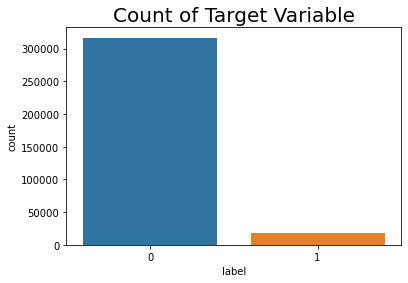

In [25]:
sns.countplot(sm.label)
plt.title("Count of Target Variable",size=20)

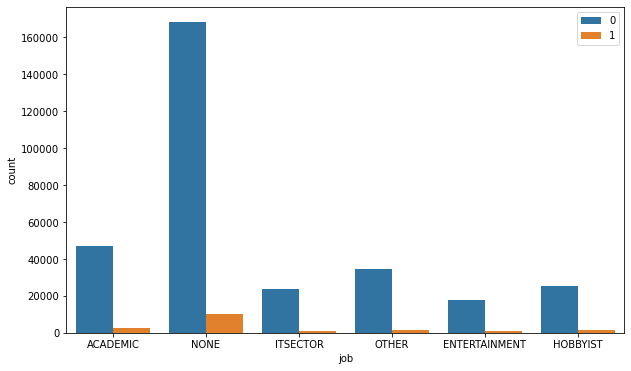

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(sm.job,hue=sm.label)
plt.legend()

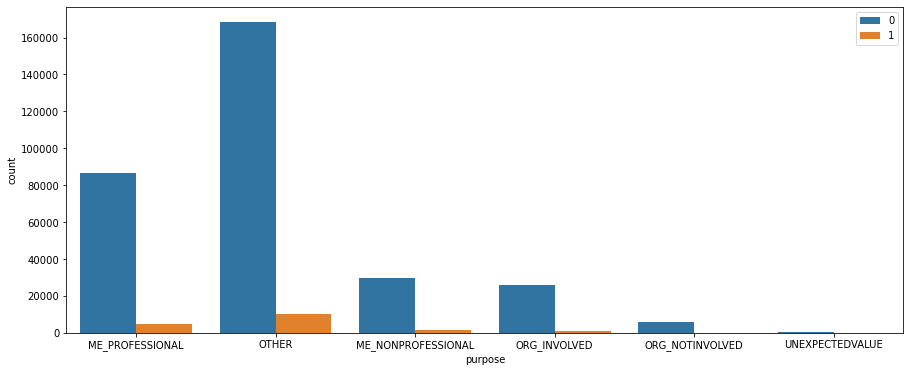

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(sm.purpose,hue=sm.label)
plt.legend()

# LABEL ENCODING

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
sm[sm.select_dtypes(include="object").columns] =sm[sm.select_dtypes(include="object").columns].apply(le.fit_transform)

In [30]:
sm.head()

,skill,job,purpose,target_group,business_group,business_segment,signup_source,signup_category,country_code,download_attempts,product_platforms,machines,label
0,0,0,1,2,1,0,25,1,0,2.0,0,1.0,0
1,0,0,1,2,1,0,86,1,0,1.0,2,0.0,0
2,0,4,4,4,3,3,28,3,0,3.0,1,1.0,0
3,0,0,0,2,1,0,86,1,0,2.0,2,1.0,0
4,0,0,1,2,1,0,86,1,0,1.0,0,0.0,0


# OVER SAMPLING

In [31]:
from sklearn.model_selection import train_test_split
sm_train,sm_test = train_test_split(sm, test_size=0.3)

In [32]:
df=sm_train[sm_train.label==1]

In [33]:
sm_train= pd.concat([sm_train,df,df,df,df,df,df,df,df,df,df,df], axis=0)

In [34]:
sm_train.label.value_counts()

0    221657
1    150528
Name: label, dtype: int64

In [35]:
sm_x_train=sm_train.iloc[:,0:12]
sm_x_test=sm_test.iloc[:,0:12]
sm_y_train=sm_train.iloc[:,12]
sm_y_test=sm_test.iloc[:,12]

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,make_scorer

In [37]:
# User define function for model report

def model_report(actual,predicted):
    print("Accuracy score= ", accuracy_score(actual,predicted))
    print("Precision Score= ", precision_score(actual,predicted))
    print("Recall= ", recall_score(actual,predicted))
    print("F1score= ", f1_score(actual,predicted))
    print("Roc score= ", roc_auc_score(actual,predicted))

# LOGISTIC REGRESSION

In [38]:
 from sklearn.linear_model import LogisticRegression
log= LogisticRegression(class_weight={0:0.4,1:0.6})

In [39]:
log.fit(sm_x_train,sm_y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.4, 1: 0.6})

In [40]:
pred_log= log.predict(sm_x_test)


In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
tab_log= confusion_matrix(pred_log, sm_y_test)
tab_log

array([[51428,  2144],
       [43586,  3215]], dtype=int64)

In [43]:
model_report(sm_y_test,pred_log)

Accuracy score=  0.544399390274277
Precision Score=  0.06869511335227879
Recall=  0.5999253592088076
F1score=  0.1232745398773006
Roc score=  0.570596480938944


In [44]:
Accuracy_log = accuracy_score(sm_y_test,pred_log)
Precision_log= precision_score(sm_y_test,pred_log)
Recall_log = recall_score(sm_y_test,pred_log)
F1_score_log=f1_score(sm_y_test,pred_log)
Roc_Score_log= roc_auc_score(sm_y_test,pred_log)

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt= DecisionTreeClassifier(max_depth=9,min_samples_split=500,min_samples_leaf=500, class_weight={0:0.37,1:0.63})

In [47]:
dt.fit(sm_x_train,sm_y_train)

DecisionTreeClassifier(class_weight={0: 0.37, 1: 0.63}, max_depth=9,
                       min_samples_leaf=500, min_samples_split=500)

In [48]:
pred_dec= dt.predict(sm_x_test)


In [49]:
tab_dec= confusion_matrix(pred_dec, sm_y_test)
tab_dec

array([[51470,  1268],
       [43544,  4091]], dtype=int64)

In [50]:
model_report(sm_y_test,pred_dec)

Accuracy score=  0.5535452761200721
Precision Score=  0.0858822294531332
Recall=  0.7633886919201344
F1score=  0.15439483715137564
Roc score=  0.6525491673548091


In [51]:
Accuracy_dec = accuracy_score(sm_y_test,pred_dec)
Precision_dec= precision_score(sm_y_test,pred_dec)
Recall_dec = recall_score(sm_y_test,pred_dec)
F1_score_dec=f1_score(sm_y_test,pred_dec)
Roc_Score_dec= roc_auc_score(sm_y_test,pred_dec)

# ADABOOST

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(dt,n_estimators=100)

In [53]:
adb.fit(sm_x_train,sm_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.37,
                                                                       1: 0.63},
                                                         max_depth=9,
                                                         min_samples_leaf=500,
                                                         min_samples_split=500),
                   n_estimators=100)

In [54]:
pred_adb=adb.predict(sm_x_test)

In [55]:
tab= confusion_matrix(pred_adb,sm_y_test)
tab

array([[62848,  1971],
       [32166,  3388]], dtype=int64)

In [56]:
model_report(sm_y_test,pred_adb)

Accuracy score=  0.6598985783029301
Precision Score=  0.0952916690105192
Recall=  0.6322075013995149
F1score=  0.16561972967027594
Roc score=  0.6468339588796047


In [57]:
Accuracy_adb = accuracy_score(sm_y_test,pred_adb)
Precision_adb= precision_score(sm_y_test,pred_adb)
Recall_adb = recall_score(sm_y_test,pred_adb)
F1_score_adb=f1_score(sm_y_test,pred_adb)
Roc_Score_adb= roc_auc_score(sm_y_test,pred_adb)

# Randomforest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150, max_depth=9,min_samples_split=500,class_weight={0:0.39,1:0.61})


In [59]:
rf.fit(sm_x_train,sm_y_train)

RandomForestClassifier(class_weight={0: 0.39, 1: 0.61}, max_depth=9,
                       min_samples_split=500, n_estimators=150)

In [60]:
pred_rf= rf.predict(sm_x_test)

In [61]:
tab_rf= confusion_matrix(pred_rf, sm_y_test)
tab_rf

array([[61237,  1688],
       [33777,  3671]], dtype=int64)

In [62]:
model_report(sm_y_test,pred_rf)

Accuracy score=  0.6466679286262241
Precision Score=  0.09802926725058748
Recall=  0.6850158611681284
F1score=  0.17151400471885442
Roc score=  0.6647604407404621


In [63]:
Accuracy_rf = accuracy_score(sm_y_test,pred_rf)
Precision_rf= precision_score(sm_y_test,pred_rf)
Recall_rf = recall_score(sm_y_test,pred_rf)
F1_score_rf=f1_score(sm_y_test,pred_rf)
Roc_Score_rf= roc_auc_score(sm_y_test,pred_rf)

# XGboost

In [64]:
from xgboost import XGBClassifier


In [65]:
xg=XGBClassifier(n_estimators=100,max_depth=8,learning_rate=0.14,subsample=0.7,scale_pos_weight=1.4)

In [66]:
xg.fit(sm_x_train,sm_y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.14, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.4, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
pred_xg=xg.predict(sm_x_test)

In [68]:
tab_xg= confusion_matrix(pred_xg, sm_y_test)
tab_xg

array([[67335,  2110],
       [27679,  3249]], dtype=int64)

In [69]:
model_report(sm_y_test,pred_xg)

Accuracy score=  0.7032170005878075
Precision Score=  0.1050504397309881
Recall=  0.6062698264601605
F1score=  0.17907239507261552
Roc score=  0.6574774311748042


In [70]:
Accuracy_xg = accuracy_score(sm_y_test,pred_xg)
Precision_xg= precision_score(sm_y_test,pred_xg)
Recall_xg = recall_score(sm_y_test,pred_xg)
F1_score_xg=f1_score(sm_y_test,pred_xg)
Roc_Score_xg= roc_auc_score(sm_y_test,pred_xg)

In [71]:
imp_features=pd.DataFrame(xg.feature_importances_,sm_x_test.columns)


In [72]:
imp_features.sort_values(by=0,ascending=False)

,0
skill,0.262101
purpose,0.164849
signup_category,0.164677
business_group,0.051738
target_group,0.050858
product_platforms,0.048843
machines,0.047851
signup_source,0.047197
business_segment,0.043969
download_attempts,0.042965


# Naive Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()

In [74]:
naive_bayes.fit(sm_x_train,sm_y_train)

MultinomialNB()

In [75]:
pred_nb=naive_bayes.predict(sm_x_test)

In [76]:
tab_nb= confusion_matrix(pred_nb,sm_y_test)
tab_nb

array([[83436,  4363],
       [11578,   996]], dtype=int64)

In [77]:
model_report(sm_y_test,pred_nb)

Accuracy score=  0.8411823896864695
Precision Score=  0.07921107046285987
Recall=  0.18585557006904274
F1score=  0.11108013160095913
Roc score=  0.5319999217722653


In [78]:
Accuracy_nb = accuracy_score(sm_y_test,pred_nb)
Precision_nb= precision_score(sm_y_test,pred_nb)
Recall_nb = recall_score(sm_y_test,pred_nb)
F1_score_nb=f1_score(sm_y_test,pred_nb)
Roc_Score_nb= roc_auc_score(sm_y_test,pred_nb)

# Description of All algorithm results

In [79]:
Algorithm=list(["Logistic","DecisionTree","ADABOOST","Randomforest","Naivebayes","XGBOOST"])
accuracy=list([Accuracy_log,Accuracy_dec,Accuracy_adb,Accuracy_rf,Accuracy_nb,Accuracy_xg])
ROC=list([Roc_Score_log,Roc_Score_dec,Roc_Score_adb,Roc_Score_rf,Roc_Score_nb,Roc_Score_xg])
F1=list([F1_score_log,F1_score_dec,F1_score_adb,F1_score_rf,F1_score_nb,F1_score_xg])
Recall = list([Recall_log,Recall_dec,Recall_adb,Recall_rf,Recall_nb,Recall_xg ])
Precision=list([Precision_log,Precision_dec,Precision_adb,Precision_rf,Precision_nb,Precision_xg])               

In [80]:
# creating a dataframe
Description_table= pd.DataFrame({"Algorithms":Algorithm,"Accuracy":accuracy,"ROCscore":ROC,"F1_Score":F1,
                            "Recall":Recall,"Precision":Precision})


In [81]:
Description_table.sort_values(by="F1_Score",ascending=False,inplace=True)
Description_table

,Algorithms,Accuracy,ROCscore,F1_Score,Recall,Precision
5,XGBOOST,0.703217,0.657477,0.179072,0.606270,0.105050
3,Randomforest,0.646668,0.664760,0.171514,0.685016,0.098029
2,ADABOOST,0.659899,0.646834,0.165620,0.632208,0.095292
1,DecisionTree,0.553545,0.652549,0.154395,0.763389,0.085882
0,Logistic,0.544399,0.570596,0.123275,0.599925,0.068695
4,Naivebayes,0.841182,0.532000,0.111080,0.185856,0.079211


# Hence from above table we decide that XGboost is giving us the best results. Now we perform Cross validation to check for stability of model

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val=cross_val_score(xg,sm_x_train,sm_y_train,cv=7,scoring="accuracy")

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [84]:
print("Mean accuracy of model is ", cross_val.mean())
print("Max accuracy of model is " , cross_val.max())
print("Min accuracy of model is " , cross_val.min())

Mean accuracy of model is  0.7130781680684443
Max accuracy of model is  0.7152341545984577
Min accuracy of model is  0.7089093268633978


# The second objective was to identify customers which could be pitched for other software services

In [85]:
sm_imp=sm.iloc[:,:12]

In [86]:
# The good customers are those who have high probability of subscribing, so we need to check for people with high probability
# to find people with higher probabilities we need to run model on whole data

pred_prob_whole= xg.predict_proba(sm_imp)
pred_prob_whole

array([[0.5106554 , 0.48934463],
       [0.7845852 , 0.21541482],
       [0.60779274, 0.3922073 ],
       ...,
       [0.7489687 , 0.25103128],
       [0.723371  , 0.27662897],
       [0.9216596 , 0.07834039]], dtype=float32)

In [87]:
prob_whole_df=pd.DataFrame(pred_prob_whole)
prob_whole_df

,0,1
0,0.510655,0.489345
1,0.784585,0.215415
2,0.607793,0.392207
3,0.639694,0.360306
4,0.668511,0.331489
...,...,...
334569,0.928681,0.071319
334570,0.523108,0.476892
334571,0.748969,0.251031
334572,0.723371,0.276629


In [88]:
#Then we create again a new dataframe with all customer IDS

prob_ID_customer= pd.DataFrame({"Customer_ID":ID.ID,
                                "Probabilities":prob_whole_df.iloc[:,1]})

# using this table we can contact the customers and pitch them to opt for other softwares 

In [89]:

prob_ID_customer=prob_ID_customer.sort_values(by="Probabilities",ascending=False)
prob_ID_customer

,Customer_ID,Probabilities
327519,327520,0.981785
277783,277784,0.981785
244143,244144,0.963519
166312,166313,0.949777
111021,111022,0.949777
...,...,...
274168,274169,0.000943
156086,156087,0.000920
142676,142677,0.000744
186745,186746,0.000726
